In [14]:
import os
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage.feature import hog
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Define paths
data_dir = ('/content/drive/MyDrive/data/Asirra_ cat vs dogs')
categories = ["cats", "dogs"]
image_size = (64, 64)  # Resize images for consistency

def extract_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    features, _ = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), visualize=True, feature_vector=True)
    return features

In [7]:
import os

data_dir = "/content/drive/MyDrive/data/Asirra_ cat vs dogs"

if os.path.exists(data_dir):
    print("Dataset directory exists.")
    print("Subfolders found:", os.listdir(data_dir))
else:
    print("Dataset directory does not exist.")


Dataset directory exists.
Subfolders found: ['dog.149.xml', 'dog.146.xml', 'dog.156.jpg', 'dog.156.xml', 'dog.153.jpg', 'dog.154.xml', 'dog.16.xml', 'dog.158.jpg', 'dog.160.jpg', 'dog.16.jpg', 'dog.155.jpg', 'dog.162.jpg', 'dog.159.xml', 'dog.160.xml', 'dog.154.jpg', 'dog.153.xml', 'dog.159.jpg', 'dog.157.jpg', 'dog.155.xml', 'dog.157.xml', 'dog.158.xml', 'dog.161.xml', 'dog.161.jpg', 'dog.17.xml', 'dog.17.jpg', 'dog.171 (1).jpg', 'dog.166.jpg', 'dog.170.xml', 'dog.170.jpg', 'dog.169.xml', 'dog.165.xml', 'dog.165.jpg', 'dog.167.jpg', 'dog.169.jpg', 'dog.171 (1).xml', 'dog.162.xml', 'dog.171.xml', 'dog.167.xml', 'dog.168.jpg', 'dog.164.jpg', 'dog.164.xml', 'dog.168.xml', 'dog.166.xml', 'dog.163.xml', 'dog.171.jpg', 'dog.163.jpg', 'dog.177.jpg', 'dog.176.jpg', 'dog.180.xml', 'dog.181.xml', 'dog.175 (1).xml', 'dog.175 (1).jpg', 'dog.18.jpg', 'dog.173 (1).xml', 'dog.173.xml', 'dog.178.jpg', 'dog.174 (1).jpg', 'dog.175.xml', 'dog.175.jpg', 'dog.174.jpg', 'dog.18.xml', 'dog.181.jpg', 'dog.17

In [16]:
# Load dataset
X, y, images = [], [], []
for filename in os.listdir(data_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(data_dir, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, image_size)
            features = extract_features(img)
            label = 0 if "cat" in filename.lower() else 1  # Assign labels based on filename
            X.append(features)
            y.append(label)
            images.append(img)

X = np.array(X)
y = np.array(y)



In [22]:
# Split dataset
X_train, X_test, y_train, y_test, img_train, img_test = train_test_split(X, y, images, test_size=0.2, random_state=42)

In [23]:
# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [24]:
# Make predictions
y_pred = svm_model.predict(X_test)

In [25]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Model Accuracy: {accuracy * 100:.2f}%")


SVM Model Accuracy: 65.02%


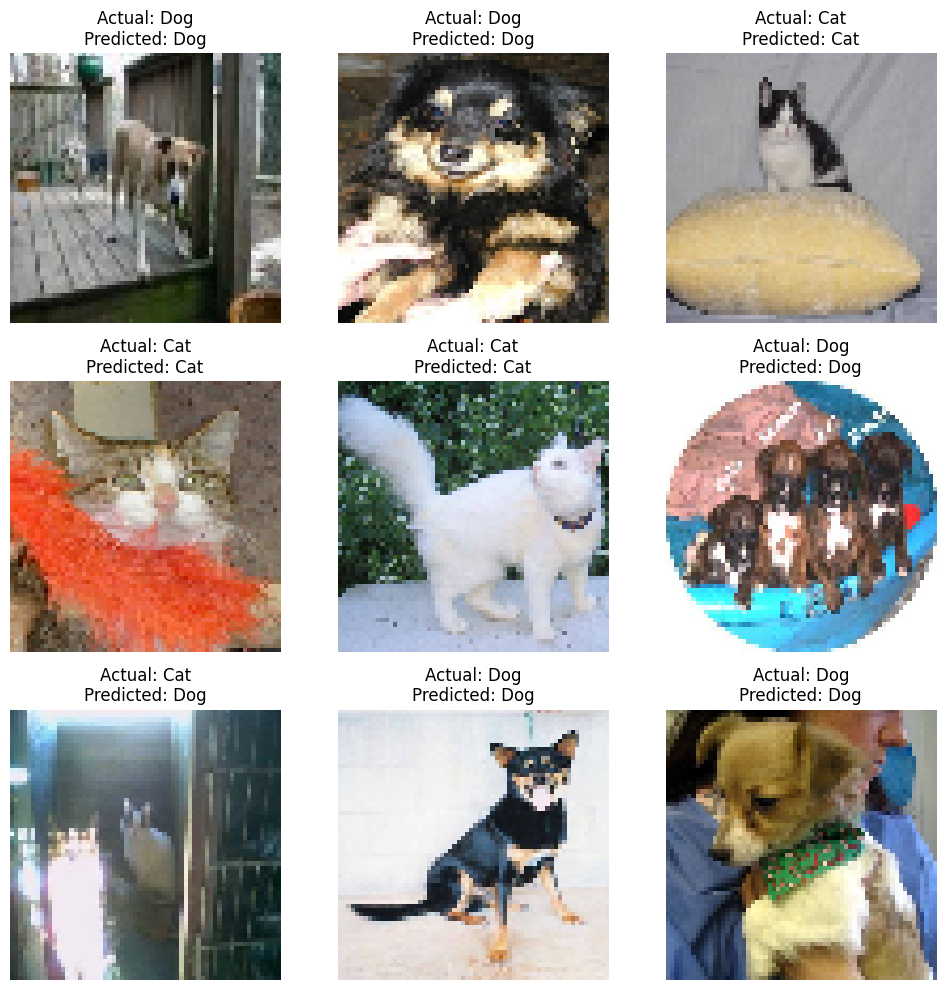

In [26]:
# Visualization
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.ravel()
for i in range(9):
    axes[i].imshow(cv2.cvtColor(img_test[i], cv2.COLOR_BGR2RGB))
    axes[i].set_title(f"Actual: {'Cat' if y_test[i] == 0 else 'Dog'}\nPredicted: {'Cat' if y_pred[i] == 0 else 'Dog'}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()